
Nivel 4 (destacado) 

### Evaluación:

Nivel 1 (reprobado) 
- El análisis descriptivo de los datos, 
- la verificación de datos faltantes y 
- la correlación se realizan de manera muy superficial.
<strong>0 puntos</strong>

Nivel 2 (suficiente) 
- El análisis descriptivo de los datos y 
- la correlación se realizan a nivel de código, 
- mostrando datos estadísticos de los datos y la matriz de correlación, 
- pero no se profundiza en su análisis y en comentar los resultados.
<strong>1 puntos</strong>

Nivel 3 (adecuado) 
- A pesar de que se realiza un análisis descriptivo y 
- exploratorio de los datos, 
- se identifican valores faltantes y 
- se analizan ciertas correlaciones. 
- No existen acciones a seguir de acuerdo con los resultados.
<strong>2 puntos</strong>

Nivel 4 (destacado) 
- Realizan una descripción de los datos, 
- cumple con los requisitos de análisis de valores faltantes, 
- cumple con las exigencias de las estadísticas pedidas. 
- Se analizan las correlaciones entre variables.
<strong>3 puntos</strong>

### Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos (EDA) es una fase fundamental en el proceso de análisis de datos que busca comprender la naturaleza y las características de un conjunto de datos antes de aplicar técnicas de modelado o inferencia estadística más avanzadas. 

Durante el EDA, se exploran y visualizan los datos para identificar patrones, tendencias, anomalías y relaciones entre las variables. 
Este enfoque ayuda a los analistas a obtener información clave, formular hipótesis y tomar decisiones fundamentadas sobre el tratamiento de los datos, lo que puede incluir la limpieza de datos, la selección de características y la preparación para modelos predictivos o descriptivos más complejos. 

En resumen, el EDA es el punto de partida crucial para cualquier análisis de datos, proporcionando una base sólida para investigaciones más profundas y modelos más precisos.

In [35]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Scikit-learn
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [2]:
# Lectura de datos
df_base = pd.read_csv("CTG.csv")

# Mostrar registros
print("REGISTROS: 25")
display(df_base.head(25))

# Mostrar la cantidad de filas y columnas
print("FILAS Y COLUMNAS")
display(df_base.shape)

# Mostras los tipos de datos
print("TIPOS DE DATOS")
display(df_base.dtypes)

REGISTROS: 25


,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
5,Fmcs_2.txt,5/3/1996,CTG0006.txt,0.0,953.0,134.0,134.0,1.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
6,Fmcs_2.txt,5/3/1996,CTG0007.txt,240.0,953.0,134.0,134.0,1.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
7,Hasc_1.txt,2/22/1995,CTG0008.txt,62.0,679.0,122.0,122.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0
8,Hasc_1.txt,2/22/1995,CTG0009.txt,120.0,779.0,122.0,122.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0
9,Hasc_1.txt,2/22/1995,CTG0010.txt,181.0,1192.0,122.0,122.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0


FILAS Y COLUMNAS


(2129, 40)

TIPOS DE DATOS


FileName     object
Date         object
SegFile      object
b           float64
e           float64
LBE         float64
LB          float64
AC          float64
FM          float64
UC          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
DL          float64
DS          float64
DP          float64
DR          float64
Width       float64
Min         float64
Max         float64
Nmax        float64
Nzeros      float64
Mode        float64
Mean        float64
Median      float64
Variance    float64
Tendency    float64
A           float64
B           float64
C           float64
D           float64
E           float64
AD          float64
DE          float64
LD          float64
FS          float64
SUSP        float64
CLASS       float64
NSP         float64
dtype: object

### Metrica 1: Realizar una descripción de los datos

Crear matriz de correlaciones existentes entre las variables numéricas del conjunto de datos, 
analizar los resultados.


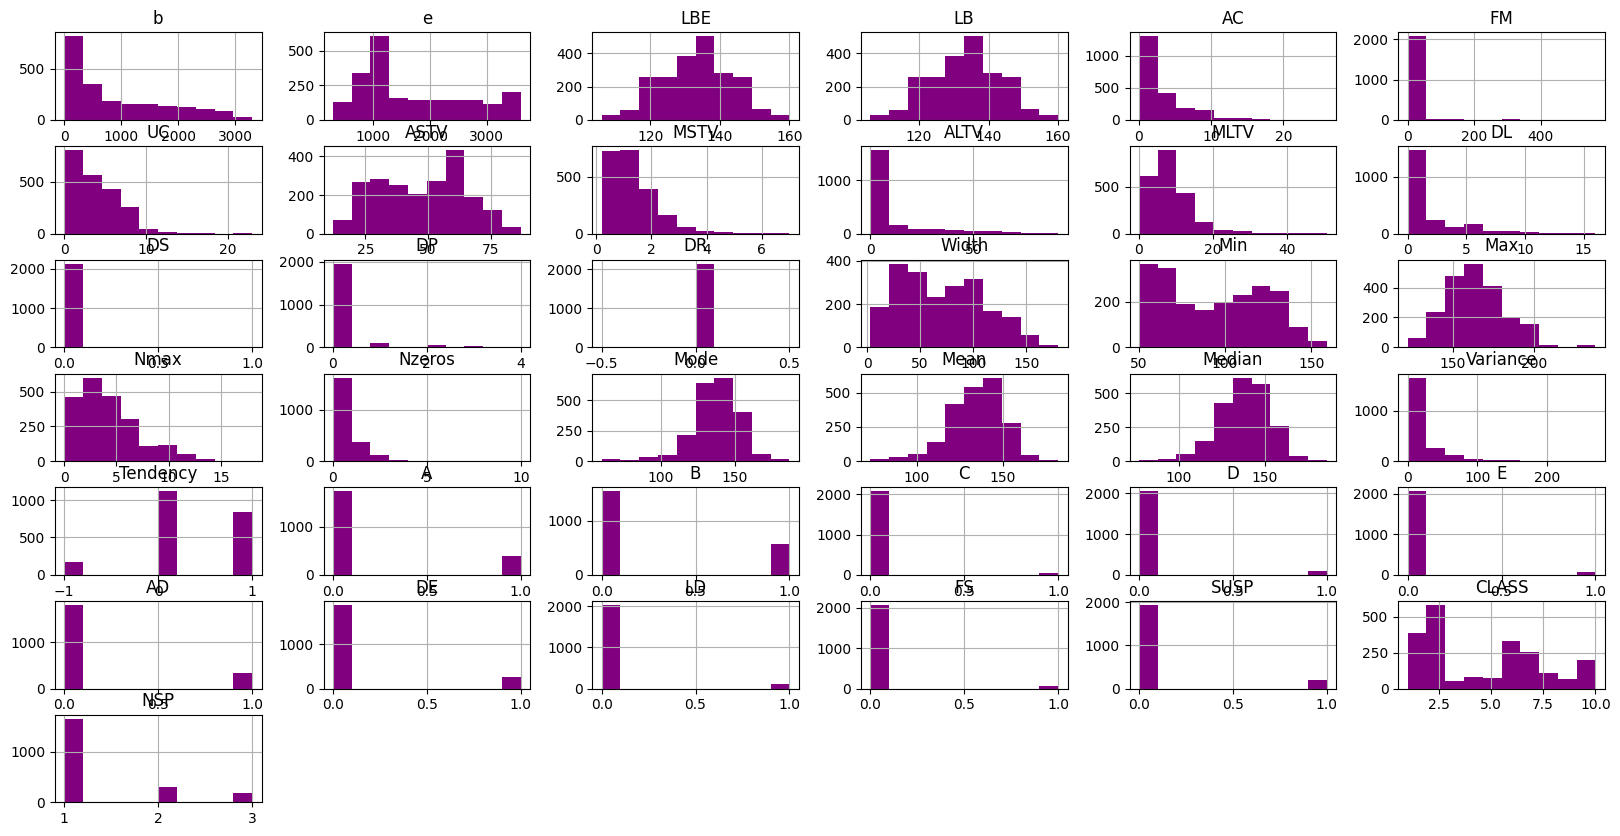

In [3]:
plt.rcParams["figure.figsize"] = [20,10]
df_base.hist(color='purple')
plt.show()

# TODO: Análizar los resultados



Proporciona un resumen estadístico de un DataFrame, incluyendo estadísticas descriptivas 
como la media, la mediana, la desviación estándar, los valores mínimos, los valores máximos 
y los cuartiles para cada columna numérica en el DataFrame. 

Este resumen es útil para obtener una comprensión rápida de la distribución y la dispersión 
de los datos en cada columna, lo que puede ayudar en el proceso de análisis exploratorio de datos.

In [4]:
# Datos estadísticos de las variables
df_base.describe()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,878.439793,1702.877234,133.303857,133.303857,2.722484,7.503056,3.669017,47.008933,1.335449,9.884814,...,0.024929,0.038100,0.033866,0.156162,0.118532,0.050329,0.032455,0.092662,4.509878,1.304327
std,894.084748,930.919143,9.840844,9.840844,3.560850,39.030452,2.877148,17.210648,0.891543,18.476534,...,0.155947,0.191482,0.180928,0.363094,0.323314,0.218675,0.177248,0.290027,3.026883,0.614377
min,0.000000,287.000000,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,55.000000,1009.000000,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,538.000000,1241.000000,133.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
75%,1521.000000,2434.750000,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
max,3296.000000,3599.000000,160.000000,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3.000000


#### Análisis variables categóricas

In [6]:
# Selecciona solo las columnas categóricas
df_categoricas = df_base.select_dtypes(include='object')
df_categoricas.head()

,FileName,Date,SegFile
0,Variab10.txt,12/1/1996,CTG0001.txt
1,Fmcs_1.txt,5/3/1996,CTG0002.txt
2,Fmcs_1.txt,5/3/1996,CTG0003.txt
3,Fmcs_1.txt,5/3/1996,CTG0004.txt
4,Fmcs_1.txt,5/3/1996,CTG0005.txt


,Frec Absoluta,Frec Relativa (%),Frec Rel Acumulada (%)
FileName,,,
S8001034.dsp,34,1.596994,1.596994
S7001029.dsp,33,1.550023,3.147017
S8001037.dsp,30,1.409112,4.556130
S8001038.dsp,26,1.221231,5.777360
S7001027.dsp,24,1.127290,6.904650
...,...,...,...
S0001055.dat,1,0.046970,99.671207
Ar_1.txt,1,0.046970,99.718178
Apsca_2.txt,1,0.046970,99.765148


C:\Users\danma\AppData\Local\Temp\ipykernel_10444\3893846531.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_frec.index, rotation=85)


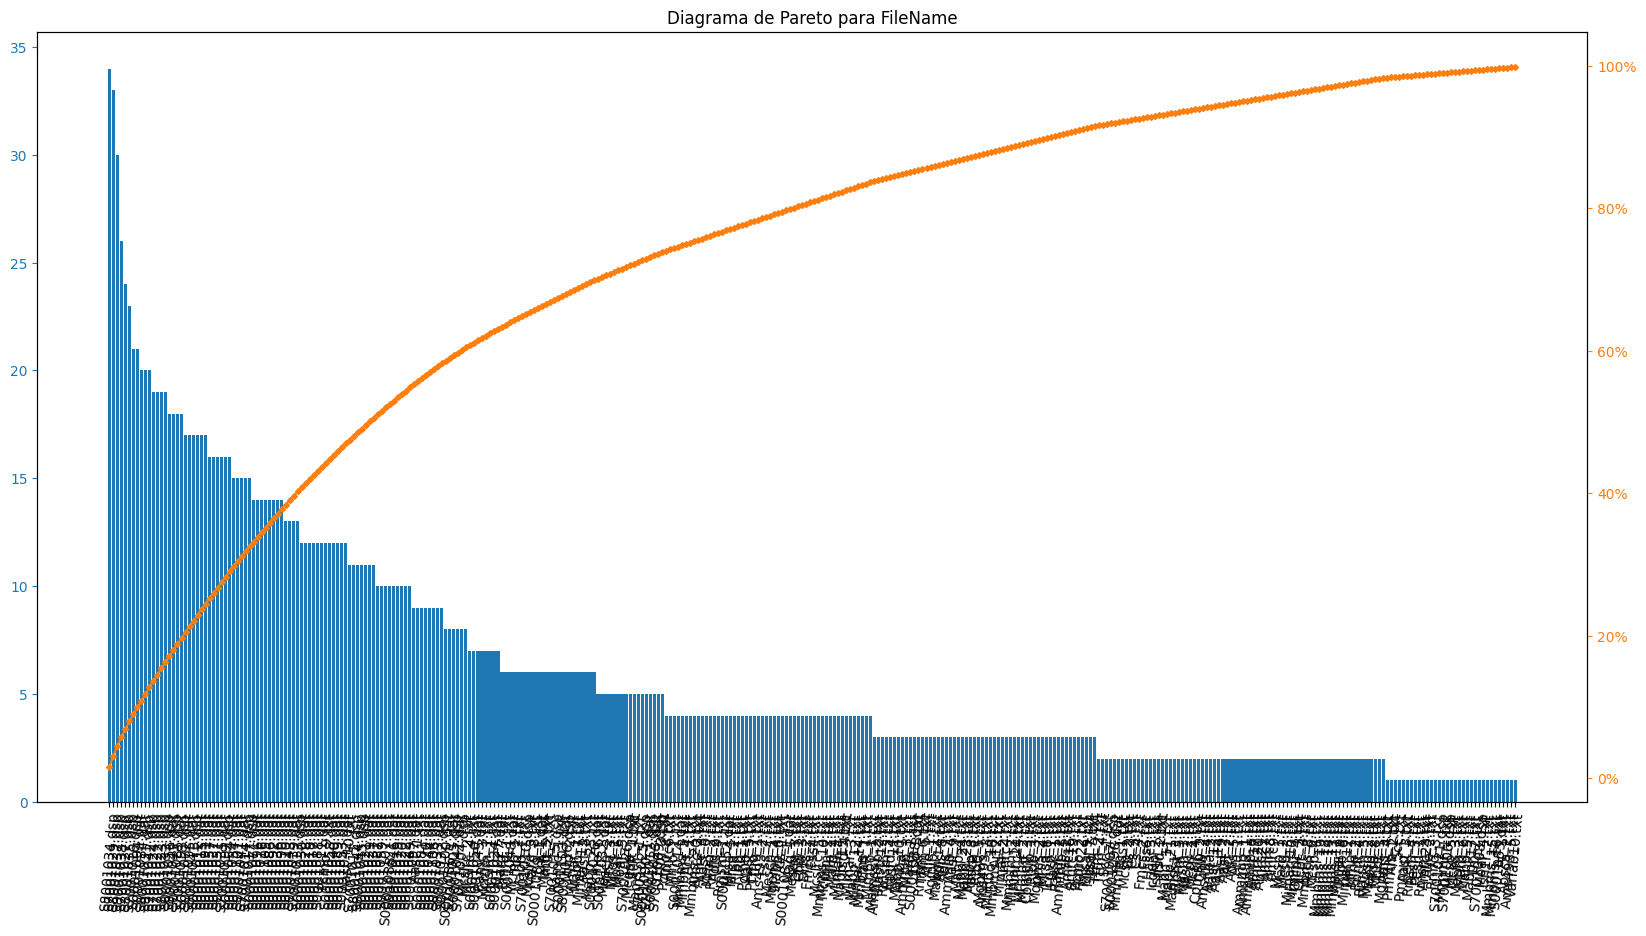

,Frec Absoluta,Frec Relativa (%),Frec Rel Acumulada (%)
Date,,,
2/22/1995,240,11.272898,11.272898
5/2/1996,160,7.515265,18.788163
7/18/1996,101,4.744011,23.532175
10/3/1996,92,4.321278,27.853452
5/3/1996,88,4.133396,31.986848
5/10/1998,85,3.992485,35.979333
5/1/1996,79,3.710662,39.689995
10/6/1996,79,3.710662,43.400658
6/6/1998,77,3.616721,47.017379


C:\Users\danma\AppData\Local\Temp\ipykernel_10444\3893846531.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_frec.index, rotation=85)


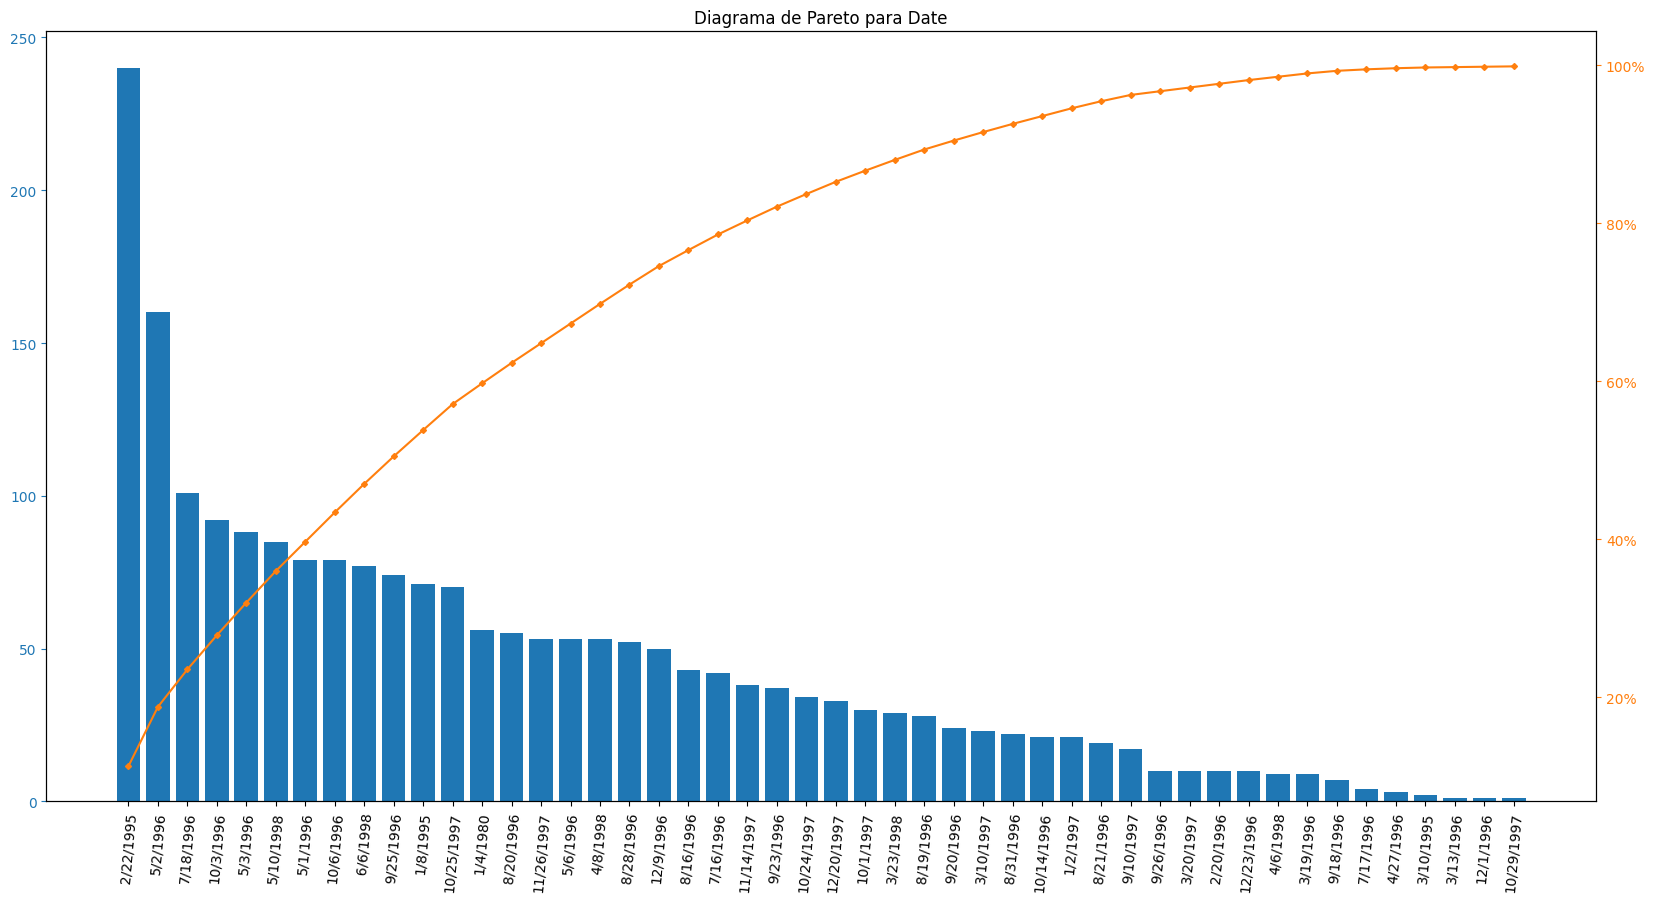

,Frec Absoluta,Frec Relativa (%),Frec Rel Acumulada (%)
SegFile,,,
CTG0001.txt,1,0.04697,0.046970
CTG1415.txt,1,0.04697,0.093941
CTG1429.txt,1,0.04697,0.140911
CTG1428.txt,1,0.04697,0.187882
CTG1427.txt,1,0.04697,0.234852
...,...,...,...
CTG0704.txt,1,0.04697,99.671207
CTG0703.txt,1,0.04697,99.718178
CTG0702.txt,1,0.04697,99.765148


C:\Users\danma\AppData\Local\Temp\ipykernel_10444\3893846531.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_frec.index, rotation=85)


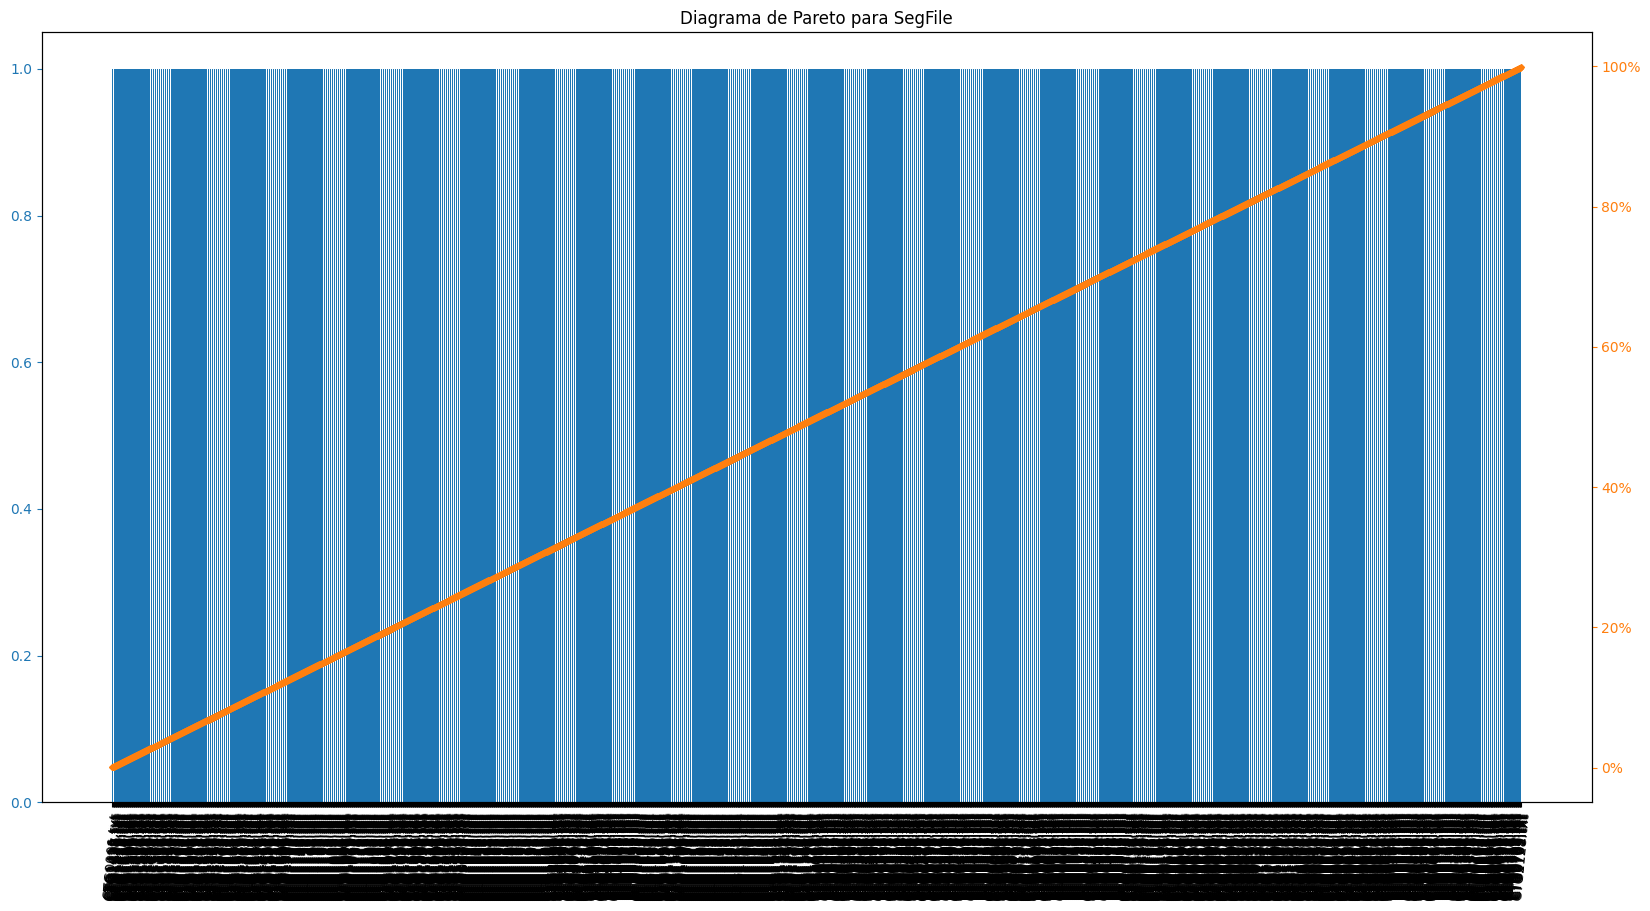

In [12]:
# Ciclo para recorrer las variables categoricas y obtener sus frecuencias
from matplotlib.ticker import PercentFormatter
for cat in df_categoricas.columns:
    # Llamamos funcion para obtener tabla de frecuencias
    df_frec = tabla_frecuencias(cat)
    display(df_frec)
    # Llamamos funcion para obtener grafica de Pareto
    grafica_pareto(cat)

##### Función para obtener tabla de frecuencias

In [11]:
def tabla_frecuencias(columna):
    """
    Función para obtener tabla de frecuencias por cada columna
    Regresa el dataframe con las frecuencias absoluta, relativa y acumulada.
    Parámetros: 
        columna: nombre de la variable categorica del dataframe original
    """
    #df_base.head()
    # Obtenemos el conteo de la columna y lo guardamos en un dataframe
    frec=df_base.value_counts(df_base[columna])
    df_frec=pd.DataFrame(frec)
    # Agregamos la columna de la Frecuencia Absoluta a nuestro DataFrame
    df_frec.columns = ['Frec Absoluta']
    
    # Calculamos la frecuencia relativa (%)
    df_frec['Frec Relativa (%)']=100*df_frec['Frec Absoluta']/len(df_base)
    
    # Obtenemos los valores de las frecuencias relatvias
    frec_rel_acu = df_frec['Frec Relativa (%)'].values
    
    # Lista donde guardaremos las frecuencias acumuladas.
    acum = []
    # Inicializamo variable en cero para el ciclo
    val_acum = 0
    
    # Ciclo para recorrer las frecuencias y sumarlas
    for i in frec_rel_acu:
        val_acum += i
        acum.append(val_acum)
    
    df_frec['Frec Rel Acumulada (%)'] = acum
    
    return df_frec


##### Función para obtener gráfica de Pareto

In [9]:
# Graficamos en Pareto
def grafica_pareto(columna):
    """
    Función para obtener la grafica de Pareto por cada columna
    Parámetros: 
        columna: nombre de la variable categorica del dataframe original
    """
    #import seaborn as sns
    #sns.countplot(data=df_base, x='FileName')
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('Diagrama de Pareto para ' + columna)
    ax.bar(df_frec.index, df_frec['Frec Absoluta'], color='C0')
    
    ax2 = ax.twinx()
    ax2.plot(df_frec.index, df_frec['Frec Rel Acumulada (%)'], color='C1', marker='D', ms=3)
    ax2.yaxis.set_major_formatter(PercentFormatter())
    
    ax.tick_params(axis='y', colors='C0')
    ax2.tick_params(axis='y', colors='C1')
    
    ax.set_xticklabels(df_frec.index, rotation=85)
    plt.show()

### Metrica 2: Analisis de Valores Faltantes

In [13]:
# Identificar los valores faltantes
col_total_nulos = df_base.isnull().sum(axis=0)
df_nulos = col_total_nulos[col_total_nulos > 0]
display(df_nulos)

FileName    3
Date        3
SegFile     3
b           3
e           3
LBE         3
LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
DR          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           3
B           3
C           3
D           3
E           3
AD          3
DE          3
LD          3
FS          3
SUSP        3
CLASS       3
NSP         3
dtype: int64

### Metrica 3: Exigencia de las estadisticas perdidas

Tratamiento de missing. Si existen valores faltantes, decidir si eliminar los registros, 
llenarlos con valores como la media, la mediana o la moda y justifique su respuesta.

<p style="color: gray">En este caso, hemos decidido eliminar los datos, se ha llegado a esta decisición ya que existe un buen número de registros y la eliminación de estos registros no afecta significativamente el análisis de los datos.</p>

In [30]:
from numpy import nan

# Selecciona solo las columnas numéricas
df_numericas = df_base.select_dtypes(include='float64')
#df_numericas.head()

# Identificar que columnas tienen datos que no pueden tener el valor de 0
# AC: (Aceleraciones de la Frecuencia Cardíaca Fetal)
# FM (Movimientos Fetales)
# UC (Contracciones Uterinas)
# LB (Línea Base de la Frecuencia Cardíaca Fetal)

cols=['AC','FM','UC','LB'] 

# Eliminar registros con valores nulos en las columnas especificadas
df_base_sin_nulos = df_numericas.dropna(subset=cols)
print("DF SIN NULOS: " ,df_base_sin_nulos.shape)
print("DF BASE", df_base.shape)
#display(df_base_sin_nulos)

DF SIN NULOS:  (2126, 37)
DF BASE (2129, 40)


<p style="color: gray">En caso de querer llenar los datos faltantes con valores como la media, la mediana o la moda dejamos los ejemplos de su aplicación</p>

### Reemplazar valores faltantes con la media

In [15]:
df_base_missing_mean=df_base.copy().iloc[:, 3:]
df_base_missing_mean=df_base_missing_mean.fillna(df_base_missing_mean.mean())

display('Verificación de datos faltantes : {0}'.format(str(df_base_missing_mean.isnull().sum().max())))

'Verificación de datos faltantes : 0'

### Reemplazar valores faltantes con la moda

In [16]:
df_base_missing_mode=df_base.copy().iloc[:, 3:]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_base_missing_mode)
df_base_missing_mode = imputer.transform(df_base_missing_mode)

display('Verificación de datos faltantes : {0}'.format(np.isnan(df_base_missing_mode).sum().max()))

'Verificación de datos faltantes : 0'

### Reemplazar valores faltantes con la mediana

In [18]:
df_base_missing_median=df_base.copy().iloc[:, 3:]
df_base_missing_median=df_base_missing_median.fillna(df_base_missing_median.median())

display('Verificación de datos faltantes : {0}'.format(str(df_base_missing_median.isnull().sum().max())))
#df_base_missing_median

'Verificación de datos faltantes : 0'

### Metrica 4: Correlaciones entre variables

                 b         e       LBE        LB        AC        FM  \
b         1.000000  0.944912 -0.020400 -0.020400 -0.038359 -0.133849   
e         0.944912  1.000000 -0.013979 -0.013979  0.071572 -0.119249   
LBE      -0.020400 -0.013979  1.000000  1.000000 -0.077967 -0.033305   
LB       -0.020400 -0.013979  1.000000  1.000000 -0.077967 -0.033305   
AC       -0.038359  0.071572 -0.077967 -0.077967  1.000000  0.053956   
FM       -0.133849 -0.119249 -0.033305 -0.033305  0.053956  1.000000   
UC        0.225595  0.386856 -0.127722 -0.127722  0.212100 -0.036626   
ASTV     -0.126355 -0.066374  0.305570  0.305570 -0.197985 -0.116461   
MSTV      0.040505  0.044605 -0.279607 -0.279607  0.191378  0.138061   
ALTV     -0.109861 -0.104566  0.285630  0.285630 -0.345162 -0.072214   
MLTV     -0.100027 -0.108141 -0.032091 -0.032091 -0.128901  0.021031   
DL        0.091783  0.163257 -0.155908 -0.155908 -0.011350  0.076283   
DS        0.063977  0.068221 -0.053518 -0.053518 -0.039341 -0.01

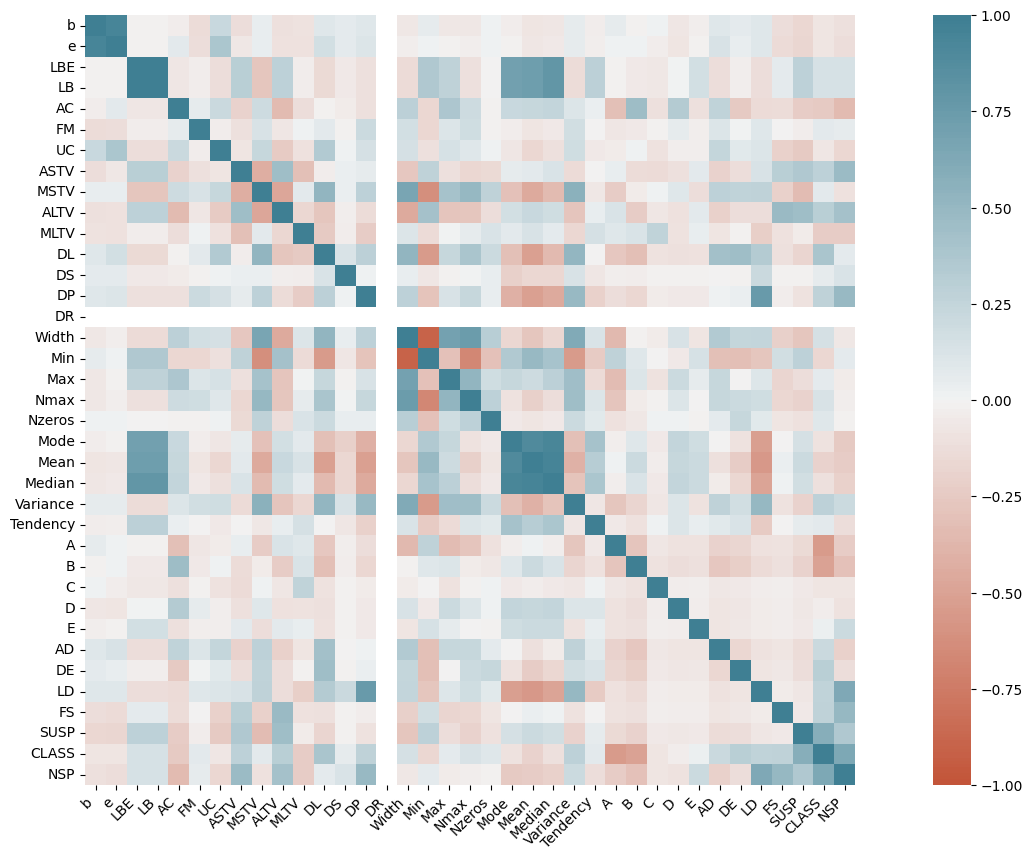

In [31]:
import seaborn as sns

# Medir la relacion entre 2 variables
correlaciones= df_base_sin_nulos.corr()
ax = sns.heatmap(
    correlaciones, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
print(correlaciones)

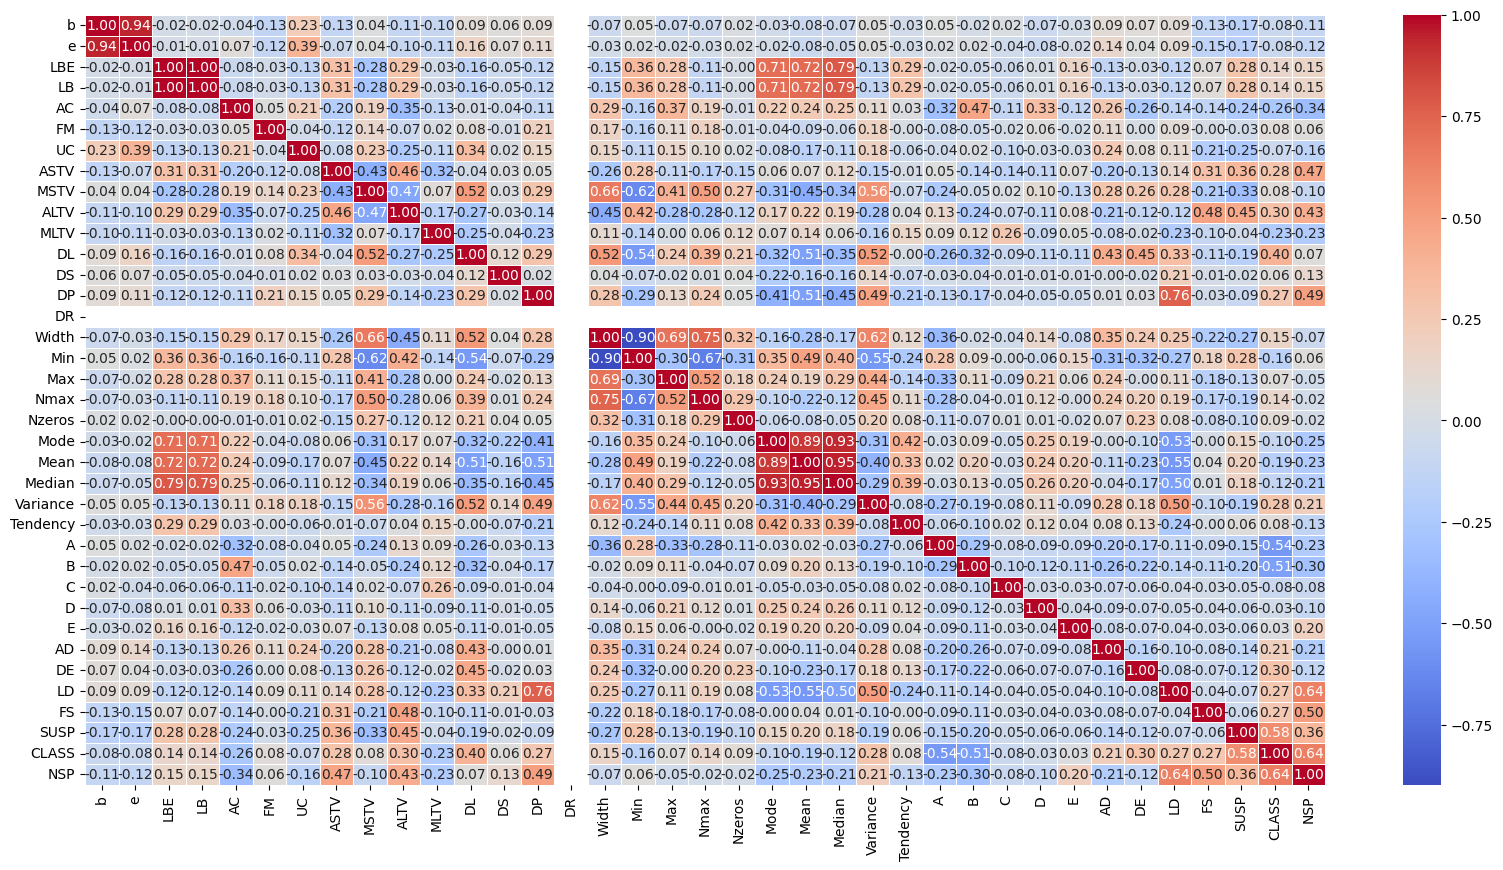

In [32]:
# Matriz de Correlacion
correlation_matrix = df_base_sin_nulos.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(20, 10))

# Dibujar el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Mostrar el gráfico
plt.show()

### Guardar .csv con datos limpios

In [33]:
# Guarda el DataFrame en un archivo CSV en la misma carpeta raíz
df_base_sin_nulos.to_csv("CTG_PREPROCESS.csv", index=False)

## Detección de anomalías con Arboles de decisión y Random Forest

In [37]:
semilla_aleatoria=1234
df_base_decision_tree=df_base_sin_nulos.copy()
X = df_base_decision_tree.drop(columns = ['NSP']).copy()
y = df_base_decision_tree['NSP']
# In the first step we will split the data in training and remaining dataset
train_x,test_x,train_y,test_y = train_test_split(X,y, train_size=0.8, random_state=semilla_aleatoria)
print(y)

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: NSP, Length: 2126, dtype: float64


### Funciones para training classifier utilizando diferentes criterios

In [42]:
# Normal random_state con semilla aleatoria=1234
def training(train_x, test_x, train_y):
    clf = DecisionTreeClassifier(random_state=semilla_aleatoria)
    clf.fit(train_x, train_y)
    return clf

# Training with Gini
def train_using_gini(train_x, test_x, train_y):
    # Classifier object creation
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
    clf_gini.fit(train_x, train_y)
    return clf_gini

# Training with Entropy
def train_using_entropy(train_x, test_x, train_y):
    # Decision tree with Entropy
    clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
    # Performing training
    clf_entropy.fit(train_x,train_y)
    return clf_entropy

### Funciones para predicción, reporte y graficar los árboles de decisión

In [57]:
# Function to make predictions
def prediction(test_x, clf_object):
    pred_y = clf_object.predict(test_x)
    print("Predicted values: ")
    print(pred_y)
    return pred_y

# Placeholder function for cal_accuracy
def cal_accuracy(test_y, pred_y):
    print("Confusion matrix : ", confusion_matrix(test_y, pred_y))
    print("Accuracy : ", accuracy_score(test_y, pred_y)*100, "%")
    print("Report: ", classification_report(test_y, pred_y))

def plot_decision_tree(clf_object, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, class_names=class_names, rounded=True)
    plt.show()

### Graficando los diferentes arboles de decisión

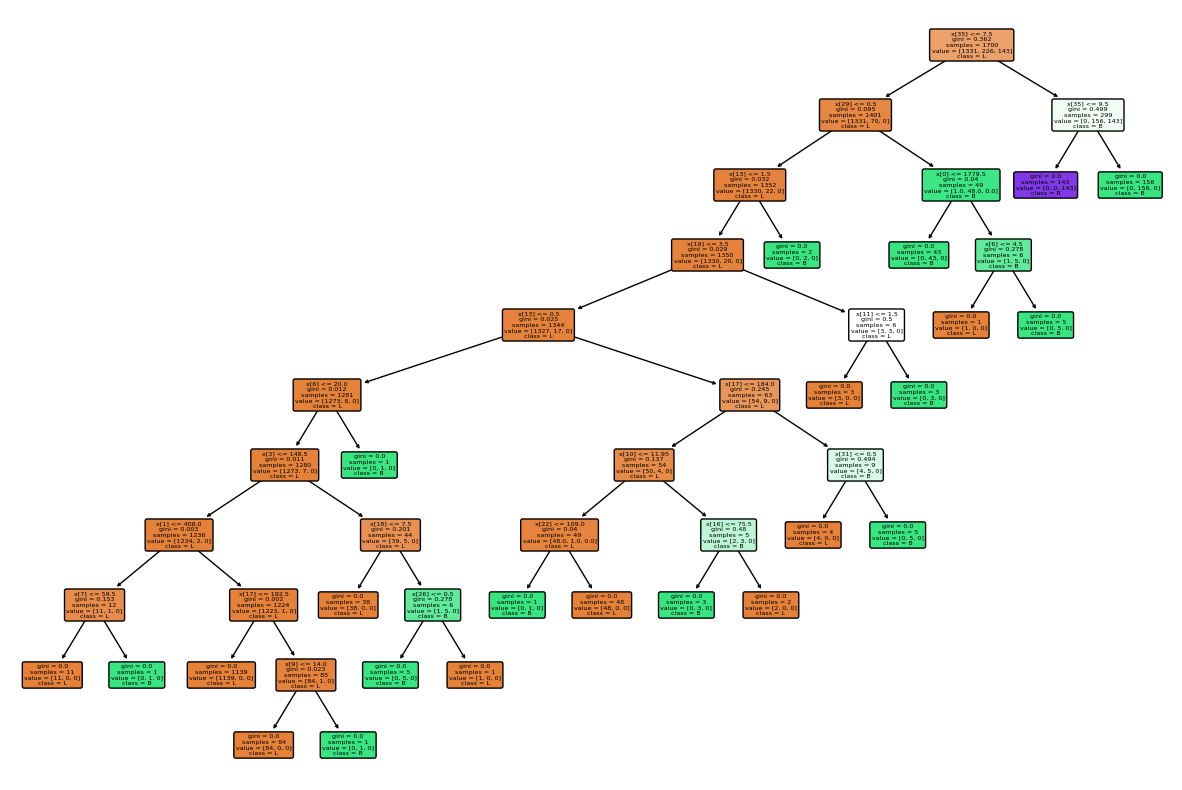

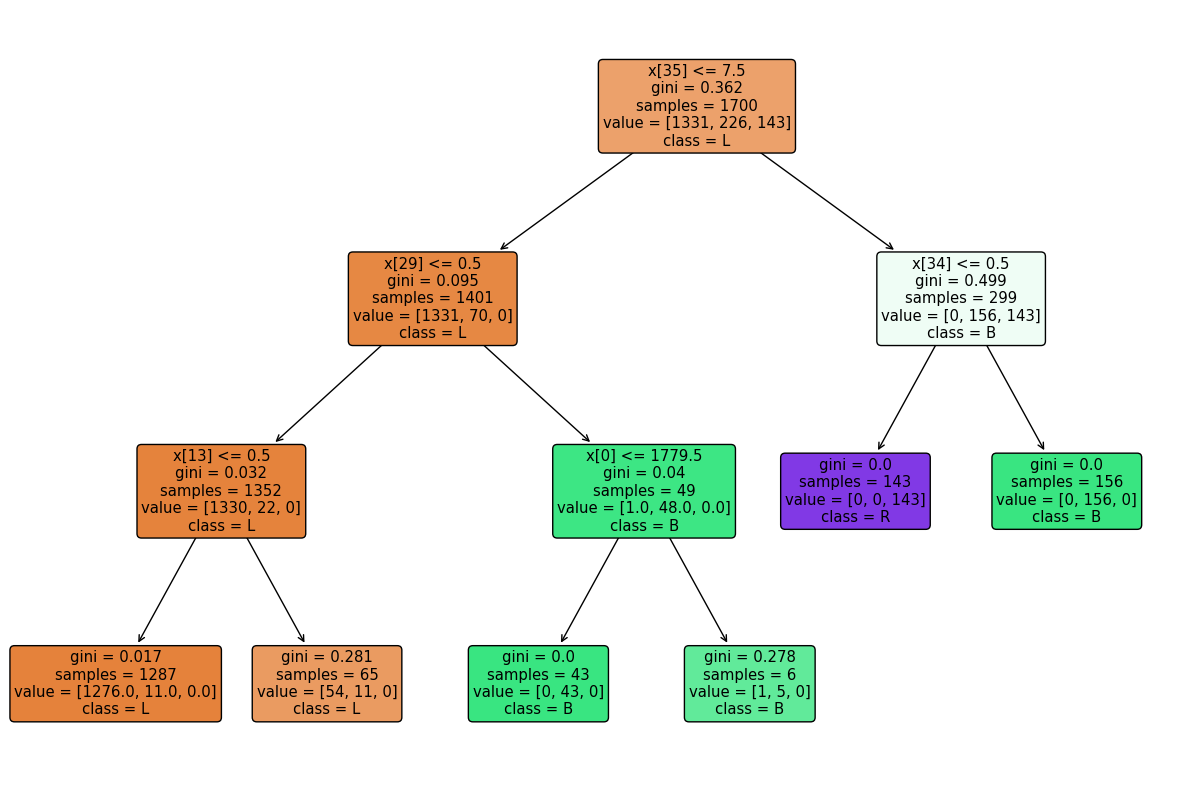

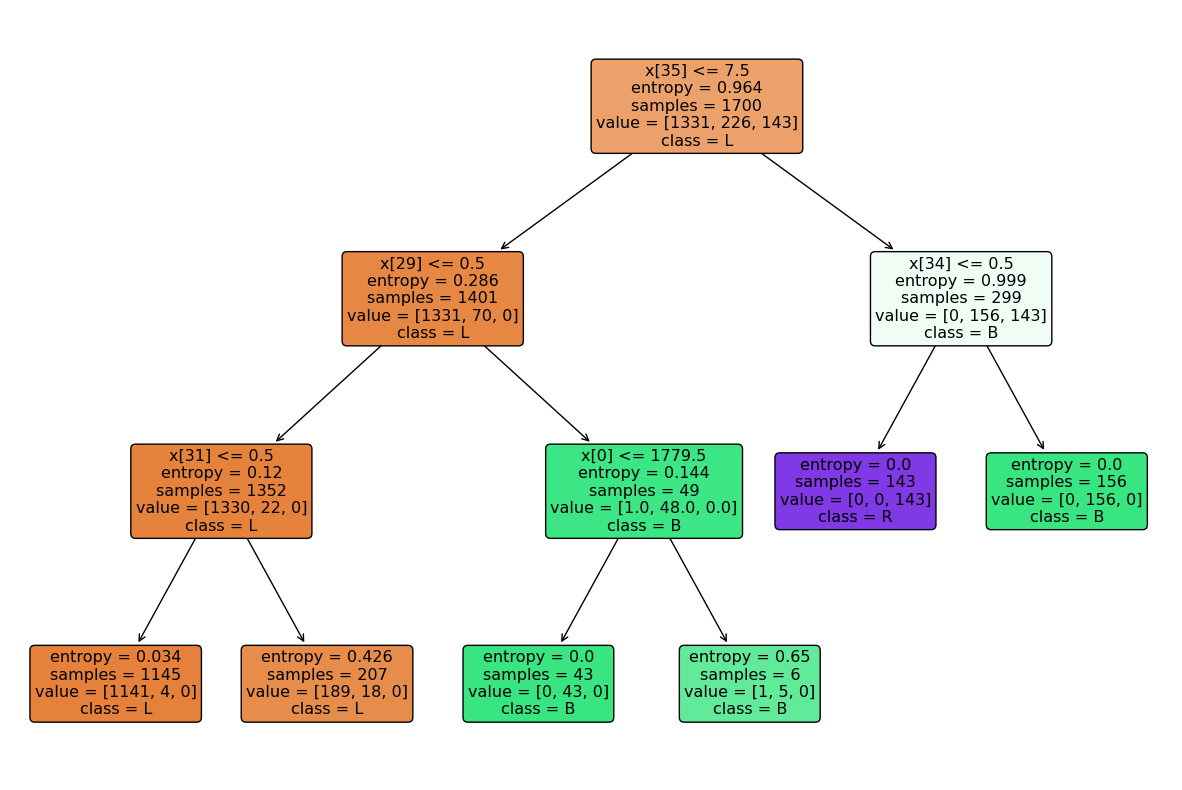

In [58]:
clf = training(train_x, test_x, train_y)
clf_gini = train_using_gini(train_x, test_x, train_y)
clf_entropy = train_using_entropy(train_x, test_x, train_y)
plot_decision_tree(clf, ['L','B','R'])
plot_decision_tree(clf_gini, ['L','B','R'])
plot_decision_tree(clf_entropy, ['L','B','R'])

### Resultados 
#### Incluyen Predicciones, Matriz de confusión, Accuracy y Classification Report

In [62]:
print("Resultados Index:")
pred_y = prediction(test_x, clf)
cal_accuracy(test_y, pred_y)

Resultados Index:
Predicted values: 
[2. 1. 1. 1. 3. 1. 3. 3. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 2. 1. 2. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 3. 2. 1. 1. 2. 1. 1. 3. 1. 3. 2. 1. 2.
 1. 1. 2. 3. 1. 3. 3. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 3. 1. 1. 2. 1. 1. 1. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 3. 1. 1. 2. 1. 1. 1. 1.
 2. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 1. 1. 1. 1. 3. 1. 2. 3.
 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 2.
 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3.
 2. 2. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1.
 2. 1. 1. 1. 2

### Resultados con Gini

In [63]:
print("Resultados Gini:")
pred_y_gini = prediction(test_x, clf_gini)
cal_accuracy(test_y, pred_y_gini)

Resultados Gini:
Predicted values: 
[2. 1. 1. 1. 3. 1. 3. 3. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 2. 1. 2. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 3. 2. 1. 1. 2. 1. 1. 3. 1. 3. 2. 1. 1.
 1. 1. 2. 3. 1. 3. 3. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 3. 1. 1. 2. 1. 1. 1. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 3. 1. 1. 2. 1. 1. 1. 1.
 2. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 1. 1. 1. 1. 3. 1. 2. 3.
 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 2.
 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3.
 2. 2. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1.
 2. 1. 1. 1. 2.

### Resultados con Entropía

In [61]:
print("Resultados Entropía:")
pred_y_entropy = prediction(test_x, clf_entropy)
cal_accuracy(test_y, pred_y_entropy)

Resultados Entropía:
Predicted values: 
[2. 1. 1. 1. 3. 1. 3. 3. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 2. 1. 2. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 3. 2. 1. 1. 2. 1. 1. 3. 1. 3. 2. 1. 1.
 1. 1. 2. 3. 1. 3. 3. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 3. 1. 1. 2. 1. 1. 1. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 3. 1. 1. 2. 1. 1. 1. 1.
 2. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 1. 1. 1. 1. 3. 1. 2. 3.
 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 2.
 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3.
 2. 2. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1.
 2. 1. 1. 1

## Clasificación Random Forest

### Algoritmo de Random Forest con la función RandomForestClassifier con 100 árboles entrenando 2 árboles en paralelo (n_jobs) con semilla aleatoria (1234)

In [72]:
clas_rndforest = RandomForestClassifier(n_estimators=100,n_jobs=2,random_state=semilla_aleatoria)
clas_rndforest.fit(train_x,train_y)

RandomForestClassifier(n_jobs=2, random_state=1234)

In [75]:
print("Resultados Random Forest:")
#predEY_clas_rnd=clas_rndforest.predict(test_x)
#print(predEY_clas_rnd)
pred_y_rnd = prediction(test_x, clas_rndforest)
cal_accuracy(test_y, pred_y_rnd)

Resultados Random Forest:
Predicted values: 
[2. 1. 1. 1. 3. 1. 3. 3. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 2. 1. 2. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 3. 2. 1. 1. 2. 1. 1. 3. 1. 3. 2. 1. 1.
 1. 1. 2. 3. 1. 3. 3. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 3. 1. 1. 2. 1. 1. 1. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 3. 1. 1. 2. 1. 1. 1. 1.
 2. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 1. 1. 1. 1. 3. 1. 2. 3.
 2. 1. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 2.
 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3.
 2. 2. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1.
 2. 1.